## IMPORT LIBRARY

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

## Input Parameters (Initial Guess -0)

In [4]:
#input parameters
rho = 1264 #kg/m^3
Diameter_1 = 60 #cm
Diameter_2 = 30 #cm
height_1 = 0 #cm
height_2 = -100 #cm
pressure_1 = 310 #kPa
pressure_2 = 350 #kPa
g = 9.81 #m/s^2
pump_power = 18 #kW

#Convert to SI
Diameter_1 = Diameter_1 / 100 #m
Diameter_2 = Diameter_2 / 100 #m
height_1 = height_1 / 100 #m
height_2 = height_2 / 100 #m
pressure_1 = pressure_1 * 1000 #Pa
pressure_2 = pressure_2 * 1000 #Pa
pump_power = pump_power * 1000 #W

#convert diameter to area
Area_1 = (np.pi/4) * Diameter_1**2 #m^2
Area_2 = (np.pi/4) * Diameter_2**2 #m^2

#initial guess for Q
Q_guess = -0.0001 #m^3/s

In [12]:
#create Constant function
def Constant():
    term_1 = pressure_1/(rho*g)
    term_2 = height_1
    term_3 = pressure_2/(rho*g)
    term_4 = height_2
    return term_1 + term_2 - term_3 - term_4

print("Constant value: ", Constant())

#newton raphson method to solve for Q
def f(Q):
    term_5 = Q**2/(Area_2**2 * 2*g)
    term_6 = Q**2/(Area_1**2 * 2*g)
    term_7 = pump_power/(rho*g*Q)
    return term_5 - term_6 - term_7 - Constant()
    
def f_prime(Q):
    term_8 = (2*Q)/(Area_2**2 * 2*g)
    term_9 = (2*Q)/(Area_1**2 * 2*g)
    term_10 = -pump_power/(rho*g*Q**2)
    return term_8 - term_9 - term_10

#save all guesses for plotting
Q_allguess = [Q_guess]
tolerance = 1e-10
max_iterations = 100
Q_current = Q_guess
for iteration in range(max_iterations):
    f_current = f(Q_current)
    f_prime_current = f_prime(Q_current)
    Q_next = Q_current - f_current / f_prime_current
    if (abs((Q_next - Q_current)/Q_current)) < tolerance:
        break
    Q_current = Q_next
    Q_allguess.append(Q_current)
    print("Calculated flow rate Q: ", Q_current, "m^3/s")
print("Final flow rate Q after", iteration, "iterations: ", Q_current, "m^3/s")

Constant value:  -2.2258480754590373
Calculated flow rate Q:  -0.00020001533342419884 m^3/s
Calculated flow rate Q:  -0.00040009200997384017 m^3/s
Calculated flow rate Q:  -0.0008004294680890674 m^3/s
Calculated flow rate Q:  -0.0016018413372369802 m^3/s
Calculated flow rate Q:  -0.0032076172009770487 m^3/s
Calculated flow rate Q:  -0.006431012764899927 m^3/s
Calculated flow rate Q:  -0.012925475410752323 m^3/s
Calculated flow rate Q:  -0.026107682056978384 m^3/s
Calculated flow rate Q:  -0.05326993657530485 m^3/s
Calculated flow rate Q:  -0.11105916622628155 m^3/s
Calculated flow rate Q:  -0.2444403688911863 m^3/s
Calculated flow rate Q:  -0.6897081256230495 m^3/s
Calculated flow rate Q:  0.18599516259837667 m^3/s
Calculated flow rate Q:  0.3012870930408294 m^3/s
Calculated flow rate Q:  0.3805428561238743 m^3/s
Calculated flow rate Q:  0.3923270304351471 m^3/s
Calculated flow rate Q:  0.3924581266749123 m^3/s
Calculated flow rate Q:  0.3924581413603021 m^3/s
Final flow rate Q after 1

In [6]:
## plotting f(Q)
#Q_values = np.linspace(-1, 1, 100)
#f_values = f(Q_values)
#
## main axes
#fig, ax = plt.subplots(figsize=(16,12))
#ax.plot(Q_values, f_values, label='f(Q)')
#ax.axhline(0, color='black', linestyle='--')
#ax.axvline(0, color='black', linestyle='--')
#ax.set_xlabel('Flow Rate Q (m^3/s)')
#ax.set_ylabel('f(Q)')
#ax.set_xlim(-12, 12)
#ax.set_ylim(-10, 10)
#ax.set_title('Plot of f(Q) vs Flow Rate Q')
#
## plot all Q guesses
#len_Q = len(Q_allguess)
#y_dummy = np.zeros(len_Q)
#ax.plot(Q_allguess, y_dummy, 'r.', label='Q guesses')
#ax.legend()
#
## inset zoom 
#ax_inset = inset_axes(ax, width="30%", height="30%", loc='upper left')
#ax_inset.plot(Q_values, f_values, label='f(Q)')
#ax_inset.axhline(0, color='black', linestyle='--')
#ax_inset.axvline(0, color='black', linestyle='--')
#ax_inset.plot(Q_allguess, y_dummy, 'r.', label='Q guesses')
#
## set inset limits for zoom
#ax_inset.set_xlim(0.37, 0.4)
#mask = (Q_values >= 0.37) & (Q_values <= 0.4)
#ax_inset.set_ylim(f_values[mask].min(), f_values[mask].max())
#ax_inset.set_title('Zoom [0.37,0.4]')
#
##add zoom lines
#ax.indicate_inset_zoom(ax_inset, edgecolor="black")
#plt.show()
#

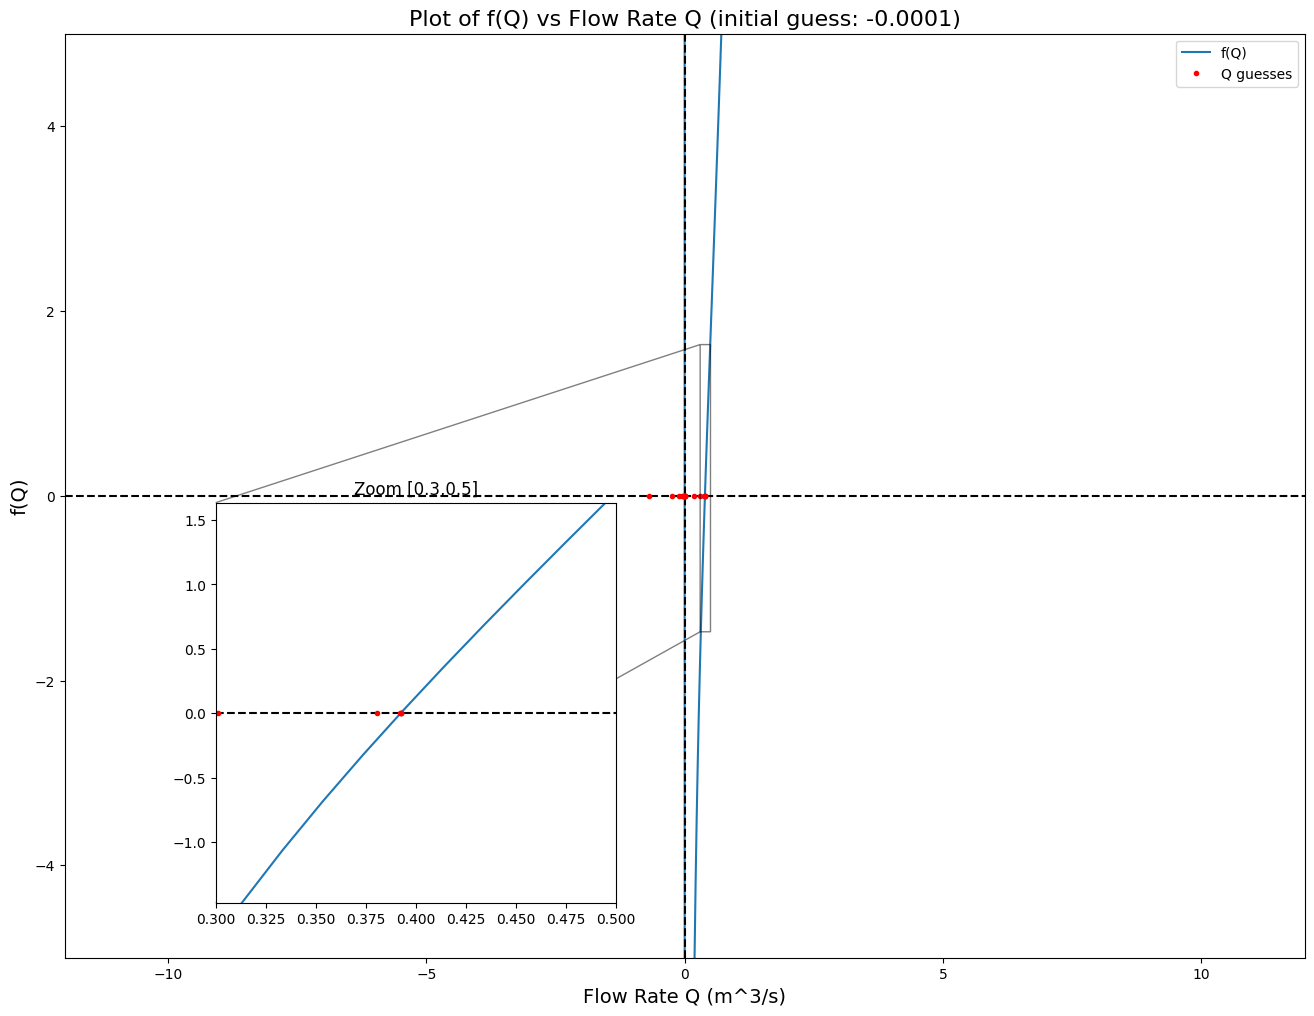

In [7]:
# plotting f(Q)
Q_values = np.linspace(-1, 1, 100)
f_values = f(Q_values)

# main axes
fig, ax = plt.subplots(figsize=(16,12))
ax.plot(Q_values, f_values, label='f(Q)')
ax.axhline(0, color='black', linestyle='--')
ax.axvline(0, color='black', linestyle='--')
ax.set_xlabel('Flow Rate Q (m^3/s)', size=14)
ax.set_ylabel('f(Q)', size=14)
ax.set_xlim(-12, 12)
ax.set_ylim(-5, 5)
ax.set_title(f'Plot of f(Q) vs Flow Rate Q (initial guess: {Q_guess})', size=16)

# plot all Q guesses
len_Q = len(Q_allguess)
y_dummy = np.zeros(len_Q)
ax.plot(Q_allguess, y_dummy, 'r.', label='Q guesses')
ax.legend()

# posisi lebih tengah tapi tidak sepenuhnya center
ax_inset = inset_axes(ax, width=4, height=4, 
                      bbox_to_anchor=(0.45, 0.5),  # x=0.25, y=0.7 relatif axes
                      bbox_transform=ax.transAxes)

ax_inset.plot(Q_values, f_values, label='f(Q)')
ax_inset.axhline(0, color='black', linestyle='--')
ax_inset.axvline(0, color='black', linestyle='--')
ax_inset.plot(Q_allguess, y_dummy, 'r.', label='Q guesses')

# set inset limits untuk zoom
ax_inset.set_xlim(0.3, 0.5)
mask = (Q_values >= 0.3) & (Q_values <= 0.5)
ax_inset.set_ylim(f_values[mask].min(), f_values[mask].max())
ax_inset.set_title('Zoom [0.3,0.5]')

# add zoom lines
ax.indicate_inset_zoom(ax_inset, edgecolor="black")

plt.show()
